# Laboratorio 1 - Preparación y Visualización de Datos

## Entregable 1 - Limpieza de datos

Práctica realizada por: Belén Ortega Pérez, José Ignacio Navas Sanz, Paula Hipola Gómez

Lo primero que debemos hacer es importar las librerías con las que trabajaremos.

In [1]:
%reset

import numpy as np                        #Esta libreria nos permite trabajar con numericos
import pandas as pd                       #Pandas nos permite trabajar con datasets y csv
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt           #Las dos librerias anteriores nos permiten pintar las funciones
from sklearn import preprocessing         #Nos sirve para normalizar los datos

from matplotlib import pyplot as plt 
import seaborn as sns                     #Nos sirve para pintar graficas o ilustrar la matriz de confusion 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### 1.1- (1 punto) Descripción y limpieza de los datos.
#### Carga los datos en un DataFrame. Detecta y elimina los registros redundantes o con missing values. Recuerda que los missing values están marcados con el carácter ‘?’. ¿Cuántos registros has eliminado de cada tipo? ¿Qué campos tienen registros con ‘missing values’? Presenta un gráfico que muestre el número de missing values por atributo.

Añadimos el dataset con el que vamos a trabajar. En este caso vamosa utilizar una colección de datos sobre pacientes con hepatitis.

In [2]:
data = pd.read_csv('hepatitis_data.csv')
data.head()                               #Función para ver las primeras instancias del dataset

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Para poder eliminar los registros con missing values primero tenemos que reemplazar '?' por NaN para poder utilizar una función que nos permita eliminarlos facilmente.

In [3]:
data = data.replace('?', np.NaN)

**Datos duplicados**

In [4]:
duplicates_data = data.duplicated().sum()   #Cuenta el número de datos duplicados
print('Hay',duplicates_data,'datos duplicados')
data.drop_duplicates(inplace = True)

Hay 0 datos duplicados


**Missing values**

In [5]:
missing_data1 = data.isnull().sum().sum()  #Cuenta el total de missing values en el dataset
missing_data2 = data.isnull().sum()        #Cuenta el total de missing values por atributo
print('Hay',missing_data1,' valores nulos')
print('Distribuido en columnas:')
print(missing_data2)

Hay 167  valores nulos
Distribuido en columnas:
class              0
age                0
sex                0
steroid            1
antivirals         0
fatigue            1
malaise            1
anorexia           1
liver_big         10
liver_firm        11
spleen_palable     5
spiders            5
ascites            5
varices            5
bilirubin          6
alk_phosphate     29
sgot               4
albumin           16
protime           67
histology          0
dtype: int64


In [6]:
data = data.dropna()                       #Eliminamos los missing values

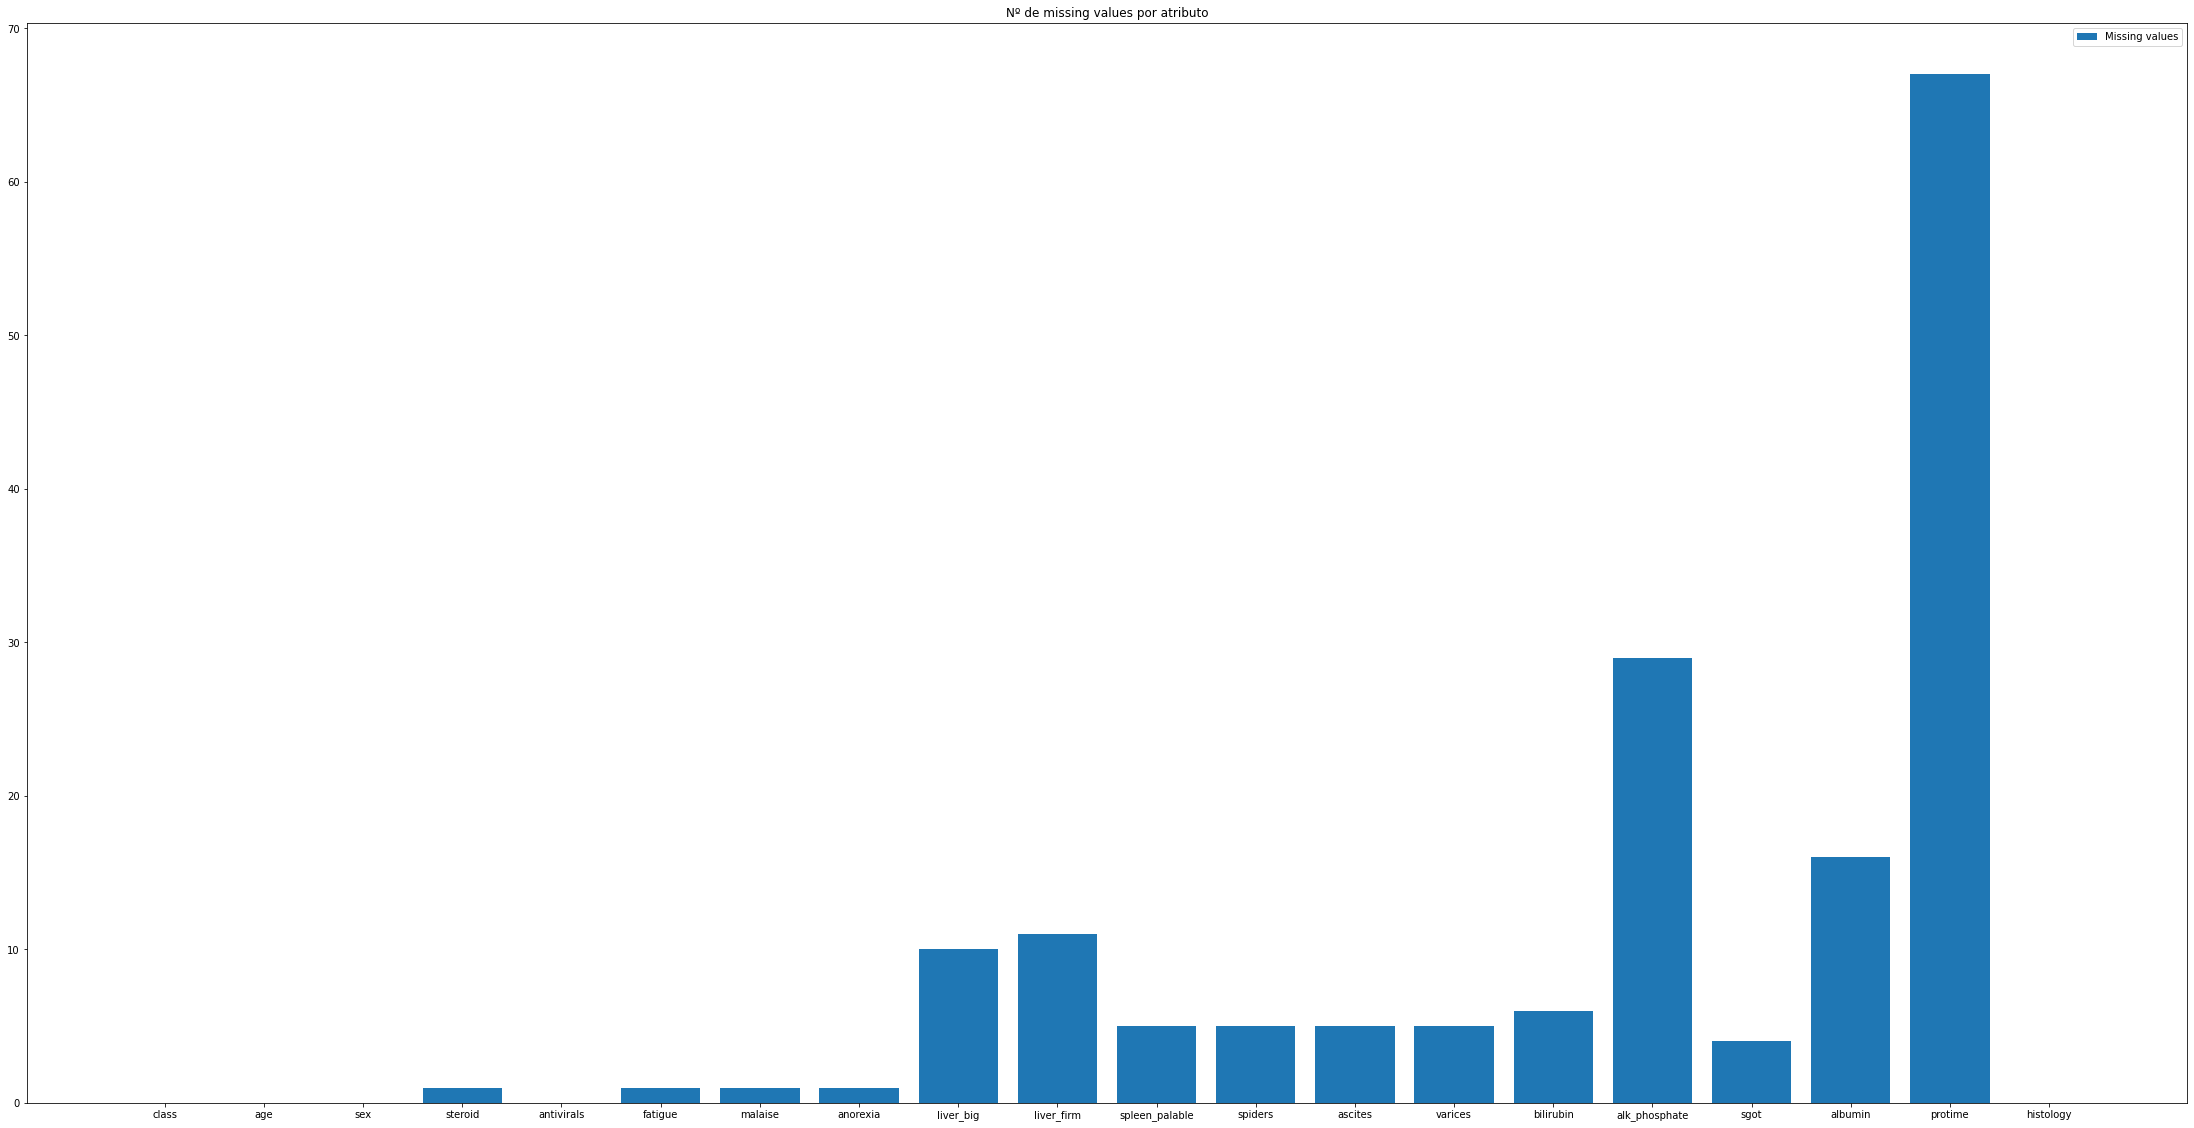

In [7]:
#Gráfico
figura = plt.figure(figsize=(30, 15))
axis = figura.add_axes([0,0,1,1])
x_axis = missing_data2.index
y_axis = missing_data2.values
axis.bar(x_axis, y_axis, label="Missing values")
#Propiedades del gráfico
plt.title('Nº de missing values por atributo')
plt.rc('xtick', labelsize=15)
plt.legend(loc='best')                    #Leyenda
plt.show()

### 1.2-(0.5 puntos) Estudio preliminar de los datos.
#### Cómo se distribuyen los pacientes que viven (class=2) de los que mueren (class=1) en el dataset. Presenta un gráfico de tarta que muestre esta distribución de la clase ‘class’ en los datos.

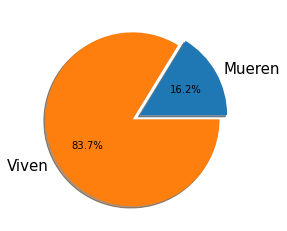

In [8]:
mortality = data['class']
mueren = mortality[mortality == 1].count()
viven = mortality[mortality == 2].count()

#Pie chart
labels = 'Mueren', 'Viven'
sizes = [mueren, viven]
explode = (0, 0.1)  # El 0.1 lo que hace es extraer un trozo del pie chart 
                    #para una fácil distinción, en este caso es el caso en el que mueren

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.show()

Viendo este gráfico podemos concluir que son más las personas que viven frente a las que mueren.